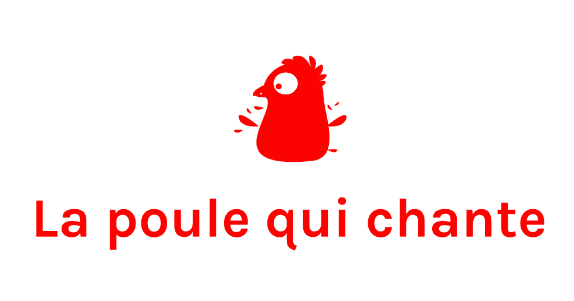

# <center> Préparation et Exploration des données </center>

### Sommaire:

* [I) Introduction](#chapter1)

    * [1) Outils Stratégique - PESTEL](#section_1_1)
    * [2) Outils Stratégique - SWOT](#section_1_2)
    * [3) Importation des librairies et des fonctions](#section_1_3)
    
* [II) Importation et Traitement des données](#chapter2)
    
* [III) Jointure](#chapter3)

* [IV) Traitement des valeurs manquantes](#chapter4)

## I) Introduction <a class="anchor" id="chapter1"></a>

La démarche de "la poule qui chante" est ici de mener une étude de marché et de cibler un premier groupe de pays où la société pourrait exporter ses produits afin de lancer son développement à l'international.

Afin d'avoir les résultats les plus pertinents possible nous souhaitons récupérer un certains nombre de données touchants à tous facteurs qui pourrait influencer la décision finale.

Pour identifier les données ou type de données qu'il serait pertinent de rassembler nous allons utiliser 2 outils stratégiques différents, la **méthode PESTEL** et la **matrice SWOT**.

### 1. Outils stratégiques - PESTEL : <a class="anchor" id="section_1_1"></a>

La méthode PESTEL permet d'étudier et d'évaluer **5 grands facteurs** macro-environnementaux pouvant influencer les choix stratégiques d'une entreprise. Il arrive que des facteurs supplémentaires soit ajoutés mais ici nous nous focaliserons sur les 5 principaux.

> Facteurs **Politiques**

- Commerce extérieur
- Stabilité politique
- Niveau de corruption
- Politique agricole
- Taxes sur importation

> Facteurs **Économiques**

- PIB
- PIB par habitant 
- Evo du PIB

> Facteurs **Sociologiques**

- Population
- Répartition de la population
- Revenu par habitant
- Habitude alimentaire
- Culture et religion

> Facteurs **Technologiques**

- R&D élevage
- Logistique

> Facteurs **Environnementaux**

- Protection de l'environnement

> Facteurs **Légaux**

- Législation et réglementation entourant l'alimentation (normes de qualités, élevage, ...)

### 2. Outils stratégiques - SWOT : <a class="anchor" id="section_1_2"></a>

La matrice SWOT permet d'étudier les forces (Strengths) et faiblesses (Weaknesses) d'une option. Celles-ci sont mises en parallèle avec des facteurs externes liés à l'environnement qu'on présente sous forme d'opportunités (Opportunities) ou de menaces (Threats).

Ici on peut voir les **Forces** et **Faiblesses** d'un pays comme ses caractéristiques à l'instant "T", et les **Opportunités** et **Menaces** qu'ils l'entourent comme l'évolution en cours ou à venir de certains facteurs:

> Force:

- Pays développé
- Population importante
- Consommation de volailles importante
- Production de volailles faible (taux de production par rapport à la consommation)
- Volume d'importation élevé


> Faiblesses:

- Faible taille de population
- Revenu par habitant bas
- Production de volailles importante (auto-suffisance)
- Consommation de volailles faible
- Politique d'importation restrictive
- Instabilité politique et économique

> Opportunités:

- Croissance économique
- Croissance démographique
- Stabilisation politique
- Tertiarisation

> Menaces:

- Développement de la production intérieure
- Crise politique 
- "Protectionnisme"

***

Avec ces informations on peut dresser le profil "idéal" à cibler:
- Un pays développé (riche, peuplé, stable) grand consommateur mais relativement dépendant d'une production extérieure.
- On veillera aussi à la stabilité, voire l'augmentation, de certains indicateurs permettant d'évaluer l'évolution économique, démographique ou politique.

### 3. Importations des librairies et des fonctions: <a class="anchor" id="section_1_3"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def correlation_heatmap(df,figsize=[30,15], cmap="viridis"):
    
    """"Affiche la matrice des corrélations"""

    correlation = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(correlation, vmax=1, vmin=-1, square=True, annot=True, fmt=".3f", cmap=cmap)
    plt.title('Tableau de corrélation entre variables')
    plt.show()

## II) Importation et Traitement des données <a class="anchor" id="chapter2"></a>

Grâce au PESTEL et à la matrice SWOT nous avons identifié certaines variables qu'il serait particulièrement pertinent d'analyser. 

Afin de s'assurer au maximum de la véracité des informations collectées nous allons principalement utiliser les données fournies par la FAO, organisation spécialisée dans l'alimentation et l'agriculture du système des Nations Unies.

Nous allons ici importer un certains nombres de données et les préparer en vue de créer un fichier final le plus complet possible sur lequel nous pourrons mener nos futures analyses.

***

Remarques:
- Toutes les **valeurs monétaires** sont exprimées en **dollars US**.
- Toutes les valeurs sont **annuelles**. Sauf précision, les données utilisées sont celles de l'année **2020**.
- Les variables **"Évolution/Evo"**, exprimées en %, tiennent compte des **5 dernières années disponibles**.

> **Population:**

Ici nous récupérons la populaton de chaque pays, sa répartition entre zone rurale et urbaine, ainsi que son évolution sur les 5 dernières années:

In [3]:
population = pd.read_csv("FAOSTAT_Population.csv")
population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,34636.207,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2016,2016,1000 personnes,17520.861,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2016,2016,1000 personnes,17115.346,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2016,2016,1000 personnes,25985.093,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2016,2016,1000 personnes,8670.939,X,Ciffre de sources internationales,NaN


In [4]:
# on crée une variable "pays_élément" pour préparer le .pivot:

population["pays_élément"] = population["Zone"] + "_" + population["Élément"]
population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,pays_élément
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,34636.207,X,Ciffre de sources internationales,NaN,Afghanistan_Population totale
1,OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2016,2016,1000 personnes,17520.861,X,Ciffre de sources internationales,NaN,Afghanistan_Hommes
2,OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2016,2016,1000 personnes,17115.346,X,Ciffre de sources internationales,NaN,Afghanistan_Femmes
3,OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2016,2016,1000 personnes,25985.093,X,Ciffre de sources internationales,NaN,Afghanistan_Population rurale
4,OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2016,2016,1000 personnes,8670.939,X,Ciffre de sources internationales,NaN,Afghanistan_Population urbaine


In [5]:
# on transforme notre df grâce à la méthode .pivot de manière à ce que les éléments soit nos variables:

population["Valeur"] = population["Valeur"]*1000
population = population.pivot(index="pays_élément", columns="Année", values="Valeur").reset_index(drop=False)
population.head()

Année,pays_élément,2016,2020
0,Afghanistan_Femmes,17115346.0,19279930.0
1,Afghanistan_Hommes,17520861.0,19692301.0
2,Afghanistan_Population rurale,25985093.0,28150604.0
3,Afghanistan_Population totale,34636207.0,38972230.0
4,Afghanistan_Population urbaine,8670939.0,9904337.0


In [6]:
# on calcule l'évolution:

population["Évolution(%)"] = ((population[2020] - population[2016]) / population[2016])*100
population.head()

Année,pays_élément,2016,2020,Évolution(%)
0,Afghanistan_Femmes,17115346.0,19279930.0,12.647036
1,Afghanistan_Hommes,17520861.0,19692301.0,12.393455
2,Afghanistan_Population rurale,25985093.0,28150604.0,8.333667
3,Afghanistan_Population totale,34636207.0,38972230.0,12.518758
4,Afghanistan_Population urbaine,8670939.0,9904337.0,14.224503


In [7]:
# on sépare "pays" et "élément":

population[["Pays", "Élément"]] = population["pays_élément"].apply(lambda x: pd.Series(str(x).split("_")))
population = population[["Pays", "Élément", 2020, "Évolution(%)"]]
population.head()

Année,Pays,Élément,2020,Évolution(%)
0,Afghanistan,Femmes,19279930.0,12.647036
1,Afghanistan,Hommes,19692301.0,12.393455
2,Afghanistan,Population rurale,28150604.0,8.333667
3,Afghanistan,Population totale,38972230.0,12.518758
4,Afghanistan,Population urbaine,9904337.0,14.224503


In [8]:
# on récupère nos données 2020 et nos évolutions séparément avant de les joindre dans un fichier unique:

pop_2020 = population.pivot(index="Pays", columns="Élément", values=2020).reset_index(drop=False)
pop_évo = population.pivot(index="Pays", columns="Élément", values="Évolution(%)").reset_index(drop=False)

population = pop_2020.merge(pop_évo, on="Pays", how="left")

population.head()

Élément,Pays,Femmes_x,Hommes_x,Population rurale_x,Population totale_x,Population urbaine_x,Femmes_y,Hommes_y,Population rurale_y,Population totale_y,Population urbaine_y
0,Afghanistan,19279930.0,19692301.0,28150604.0,38972230.0,9904337.0,12.647036,12.393455,8.333667,12.518758,14.224503
1,Afrique du Sud,30221143.0,28580784.0,19170340.0,58801927.0,39550889.0,4.196078,4.240324,-1.257571,4.217577,8.059639
2,Albanie,1433082.0,1433767.0,1114672.0,2866849.0,1827362.0,-0.230925,-0.754293,-8.388419,-0.493360,6.887590
3,Algérie,21318767.0,22132899.0,11382345.0,43451666.0,31950910.0,7.762983,7.669590,-1.787750,7.715391,10.112844
4,Allemagne,42213517.0,41115471.0,18610145.0,83328988.0,63930305.0,1.130376,1.295224,-0.252171,1.211646,1.063631


In [9]:
# calcul de la part de population urbaine:
# on ne calcule pas la part de la pop. rurale car elle est simplement égale à la différence entre la pop. totale et la pop. urbaine

population["Population urbaine (%)"] = (population["Population urbaine_x"]/population["Population totale_x"])*100

In [10]:
population.rename(columns={"Population totale_x" : "Population",
                           "Population totale_y" : "Evo population (%)",
                           "Population urbaine_y" : "Evo population urbaine (%)"}, inplace = True)

population = population[["Pays",
                         "Population", "Evo population (%)",
                         "Population urbaine (%)", "Evo population urbaine (%)"]]

population.head()

Élément,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639
2,Albanie,2866849.0,-0.493360,63.741132,6.887590
3,Algérie,43451666.0,7.715391,73.532071,10.112844
4,Allemagne,83328988.0,1.211646,76.720367,1.063631


In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pays                        236 non-null    object 
 1   Population                  235 non-null    float64
 2   Evo population (%)          235 non-null    float64
 3   Population urbaine (%)      233 non-null    float64
 4   Evo population urbaine (%)  232 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


> **Disponibilité:**

Ici nous récupérons des données de consommation, de production et d'importation essentielles pour notre étude: 

Ces valeurs en elles-mêmes sont intéressantes mais peuvent aussi être influencées par l'échelle des différents pays. Ainsi, nous pouvons ajouter des variables supplémentaires afin d'affiner nos observations:
- La **Disponibilité intérieure par habitant** (=(Production+Importation-Exportation)/Nombre d'habitants) qui permet de mesurer la consommation en viande de poulet et avoir une idée des habitudes de consommations de leur habitants.
- Le **Taux d'importation**, la part des importations dans la disponibilité intérieure, qui mesure la dépendance du pays à une production extérieure.
- Le **Taux de production**, la part de la production dans la disponibilité intérieure, qui mesure le niveau d'auto suffisance du pays.

On va aussi s'intéresser à l'évolution des ces variables sur les 5 dernières années disponibles.

In [12]:
dispo = pd.read_csv("FAOSTAT_Dispo_poulet.csv")
dispo.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,24417.00,I,Valeur imputée
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,27938.44,I,Valeur imputée
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,35473.00,A,Chiffre officiel
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,35616.91,T,Chiffre non officiel
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5910,Exportations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,0.24,T,Chiffre non officiel


In [13]:
# on crée une variable "pays_élément" pour préparer le .pivot:

dispo["pays_élément"] = dispo["Zone"] + "_" + dispo["Élément"]
dispo.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,pays_élément
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,24417.00,I,Valeur imputée,Afghanistan_Production
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,27938.44,I,Valeur imputée,Afghanistan_Production
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,35473.00,A,Chiffre officiel,Afghanistan_Importations - Quantité
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,35616.91,T,Chiffre non officiel,Afghanistan_Importations - Quantité
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,4,Afghanistan,5910,Exportations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,0.24,T,Chiffre non officiel,Afghanistan_Exportations - Quantité


In [14]:
# on transforme notre df grâce à la méthode .pivot de manière à ce que les éléments soit nos variables:

dispo = dispo.pivot(index="pays_élément", columns="Année", values="Valeur").reset_index(drop=False)
dispo.head()

Année,pays_élément,2016,2020
0,Afghanistan_Disponibilité alimentaire en quant...,67968.0,66026.13
1,Afghanistan_Exportations - Quantité,NaN,0.24
2,Afghanistan_Importations - Quantité,35473.0,35616.91
3,Afghanistan_Production,24417.0,27938.44
4,Afrique du Sud_Disponibilité alimentaire en qu...,2029917.0,2039556.29


In [15]:
# on sépare "pays" et "élément":

dispo[["Pays", "Élément"]] = dispo["pays_élément"].apply(lambda x: pd.Series(str(x).split("_")))
dispo = dispo[["Pays", "Élément", 2016, 2020]]
dispo.head()

Année,Pays,Élément,2016,2020
0,Afghanistan,Disponibilité alimentaire en quantité (tonnes),67968.0,66026.13
1,Afghanistan,Exportations - Quantité,NaN,0.24
2,Afghanistan,Importations - Quantité,35473.0,35616.91
3,Afghanistan,Production,24417.0,27938.44
4,Afrique du Sud,Disponibilité alimentaire en quantité (tonnes),2029917.0,2039556.29


In [16]:
# on récupère nos données 2020 et 2016 séparément afin d'appliquer nos calculs dessus:

dispo_2020 = dispo.pivot(index="Pays", columns="Élément", values=2020).reset_index(drop=False)
dispo_2016 = dispo.pivot(index="Pays", columns="Élément", values=2016).reset_index(drop=False)

In [17]:
# afin de ne pas perdre le résultat de nos calculs on impute les nan de importations/production par 0:
dispo_2020["Exportations - Quantité"] = dispo_2020["Exportations - Quantité"].fillna(0)
dispo_2020["Importations - Quantité"] = dispo_2020["Importations - Quantité"].fillna(0)
dispo_2020["Production"] = dispo_2020["Production"].fillna(0)

dispo_2020["Disponibilité intérieure (tonnes)"] = dispo_2020["Production"]+dispo_2020["Importations - Quantité"]-dispo_2020["Exportations - Quantité"]
dispo_2020["Taux importation (%)"] = (dispo_2020["Importations - Quantité"]/dispo_2020["Disponibilité intérieure (tonnes)"])*100
dispo_2020["Taux production (%)"] = (dispo_2020["Production"]/dispo_2020["Disponibilité intérieure (tonnes)"])*100

dispo_2020.head()

Élément,Pays,Disponibilité alimentaire en quantité (tonnes),Exportations - Quantité,Importations - Quantité,Production,Disponibilité intérieure (tonnes),Taux importation (%),Taux production (%)
0,Afghanistan,66026.13,0.24,35616.91,27938.44,63555.11,56.040986,43.959392
1,Afrique du Sud,2039556.29,45619.27,398923.26,1873238.00,2226541.99,17.916718,84.132166
2,Albanie,35737.10,0.00,23503.19,12233.91,35737.10,65.766920,34.233080
3,Algérie,259700.78,568.50,0.49,260268.79,259700.78,0.000189,100.218717
4,Allemagne,978738.65,254316.47,470860.36,1066000.00,1282543.89,36.713002,83.116064


In [18]:
# afin de ne pas perdre le résultat de nos calculs on impute les valeurs manquantes de exportations et importations par 0:
dispo_2016["Exportations - Quantité"] = dispo_2016["Exportations - Quantité"].fillna(0)
dispo_2016["Importations - Quantité"] = dispo_2016["Importations - Quantité"].fillna(0)
dispo_2016["Production"] = dispo_2016["Production"].fillna(0)

dispo_2016["Disponibilité intérieure (tonnes)"] = dispo_2016["Production"]+dispo_2016["Importations - Quantité"]-dispo_2016["Exportations - Quantité"]
dispo_2016["Taux importation (%)"] = (dispo_2016["Importations - Quantité"]/dispo_2016["Disponibilité intérieure (tonnes)"])*100
dispo_2016["Taux production (%)"] = (dispo_2016["Production"]/dispo_2016["Disponibilité intérieure (tonnes)"])*100

dispo_2016.head()

Élément,Pays,Disponibilité alimentaire en quantité (tonnes),Exportations - Quantité,Importations - Quantité,Production,Disponibilité intérieure (tonnes),Taux importation (%),Taux production (%)
0,Afghanistan,67968.0,0.0,35473.0,24417.0,59890.0,59.230255,40.769745
1,Afrique du Sud,2029917.0,67336.0,478091.0,1677838.0,2088593.0,22.890578,80.333411
2,Albanie,36860.0,0.0,24158.0,12702.0,36860.0,65.539881,34.460119
3,Algérie,270285.0,0.0,1.0,266666.0,266667.0,0.000375,99.999625
4,Allemagne,900507.0,305527.0,447257.0,999070.0,1140800.0,39.205558,87.576262


In [19]:
dispo = dispo_2016.merge(dispo_2020, on="Pays", how="left")

dispo.head()

Élément,Pays,Disponibilité alimentaire en quantité (tonnes)_x,Exportations - Quantité_x,Importations - Quantité_x,Production_x,Disponibilité intérieure (tonnes)_x,Taux importation (%)_x,Taux production (%)_x,Disponibilité alimentaire en quantité (tonnes)_y,Exportations - Quantité_y,Importations - Quantité_y,Production_y,Disponibilité intérieure (tonnes)_y,Taux importation (%)_y,Taux production (%)_y
0,Afghanistan,67968.0,0.0,35473.0,24417.0,59890.0,59.230255,40.769745,66026.13,0.24,35616.91,27938.44,63555.11,56.040986,43.959392
1,Afrique du Sud,2029917.0,67336.0,478091.0,1677838.0,2088593.0,22.890578,80.333411,2039556.29,45619.27,398923.26,1873238.00,2226541.99,17.916718,84.132166
2,Albanie,36860.0,0.0,24158.0,12702.0,36860.0,65.539881,34.460119,35737.10,0.00,23503.19,12233.91,35737.10,65.766920,34.233080
3,Algérie,270285.0,0.0,1.0,266666.0,266667.0,0.000375,99.999625,259700.78,568.50,0.49,260268.79,259700.78,0.000189,100.218717
4,Allemagne,900507.0,305527.0,447257.0,999070.0,1140800.0,39.205558,87.576262,978738.65,254316.47,470860.36,1066000.00,1282543.89,36.713002,83.116064


In [20]:
# on merge aussi avec le df "population" afin de calculer la "Disponibilité intérieur / habitant":

dispo_pop = dispo.merge(population, on="Pays", how="outer")
dispo_pop.head()

Élément,Pays,Disponibilité alimentaire en quantité (tonnes)_x,Exportations - Quantité_x,Importations - Quantité_x,Production_x,Disponibilité intérieure (tonnes)_x,Taux importation (%)_x,Taux production (%)_x,Disponibilité alimentaire en quantité (tonnes)_y,Exportations - Quantité_y,Importations - Quantité_y,Production_y,Disponibilité intérieure (tonnes)_y,Taux importation (%)_y,Taux production (%)_y,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%)
0,Afghanistan,67968.0,0.0,35473.0,24417.0,59890.0,59.230255,40.769745,66026.13,0.24,35616.91,27938.44,63555.11,56.040986,43.959392,38972230.0,12.518758,25.413832,14.224503
1,Afrique du Sud,2029917.0,67336.0,478091.0,1677838.0,2088593.0,22.890578,80.333411,2039556.29,45619.27,398923.26,1873238.00,2226541.99,17.916718,84.132166,58801927.0,4.217577,67.261212,8.059639
2,Albanie,36860.0,0.0,24158.0,12702.0,36860.0,65.539881,34.460119,35737.10,0.00,23503.19,12233.91,35737.10,65.766920,34.233080,2866849.0,-0.493360,63.741132,6.887590
3,Algérie,270285.0,0.0,1.0,266666.0,266667.0,0.000375,99.999625,259700.78,568.50,0.49,260268.79,259700.78,0.000189,100.218717,43451666.0,7.715391,73.532071,10.112844
4,Allemagne,900507.0,305527.0,447257.0,999070.0,1140800.0,39.205558,87.576262,978738.65,254316.47,470860.36,1066000.00,1282543.89,36.713002,83.116064,83328988.0,1.211646,76.720367,1.063631


In [21]:
dispo_pop["Disponibilité (kg/habitant)"] = (dispo_pop["Disponibilité intérieure (tonnes)_y"]/dispo_pop["Population"])*1000
dispo_pop["Evo disponibilité (%)"] = ((dispo_pop["Disponibilité intérieure (tonnes)_y"]-dispo_pop["Disponibilité intérieure (tonnes)_x"])/dispo_pop["Disponibilité intérieure (tonnes)_x"])*100
dispo_pop["Evo taux importation"] = (dispo_pop["Taux importation (%)_y"]-dispo_pop["Taux importation (%)_x"])
dispo_pop["Evo taux production"] = (dispo_pop["Taux production (%)_y"]-dispo_pop["Taux production (%)_x"])

dispo_pop.head()

Élément,Pays,Disponibilité alimentaire en quantité (tonnes)_x,Exportations - Quantité_x,Importations - Quantité_x,Production_x,Disponibilité intérieure (tonnes)_x,Taux importation (%)_x,Taux production (%)_x,Disponibilité alimentaire en quantité (tonnes)_y,Exportations - Quantité_y,...,Taux importation (%)_y,Taux production (%)_y,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (kg/habitant),Evo disponibilité (%),Evo taux importation,Evo taux production
0,Afghanistan,67968.0,0.0,35473.0,24417.0,59890.0,59.230255,40.769745,66026.13,0.24,...,56.040986,43.959392,38972230.0,12.518758,25.413832,14.224503,1.630779,6.119736,-3.189270,3.189648
1,Afrique du Sud,2029917.0,67336.0,478091.0,1677838.0,2088593.0,22.890578,80.333411,2039556.29,45619.27,...,17.916718,84.132166,58801927.0,4.217577,67.261212,8.059639,37.865119,6.604877,-4.973859,3.798755
2,Albanie,36860.0,0.0,24158.0,12702.0,36860.0,65.539881,34.460119,35737.10,0.00,...,65.766920,34.233080,2866849.0,-0.493360,63.741132,6.887590,12.465637,-3.046392,0.227039,-0.227039
3,Algérie,270285.0,0.0,1.0,266666.0,266667.0,0.000375,99.999625,259700.78,568.50,...,0.000189,100.218717,43451666.0,7.715391,73.532071,10.112844,5.976774,-2.612329,-0.000186,0.219092
4,Allemagne,900507.0,305527.0,447257.0,999070.0,1140800.0,39.205558,87.576262,978738.65,254316.47,...,36.713002,83.116064,83328988.0,1.211646,76.720367,1.063631,15.391329,12.424955,-2.492556,-4.460198


In [22]:
# on renomme nos variables:

dispo_pop.rename(columns={"Disponibilité alimentaire en quantité (tonnes)_x" : "Disponibilité (tonnes)",
                          "Importations - Quantité_x" : "Importations (tonnes)",
                          "Taux importation (%)_y" : "Taux importation (%)", 
                          "Taux production (%)_y" : "Taux production (%)"}, inplace = True)

dispo_pop = dispo_pop[["Pays", "Population", "Evo population (%)", "Population urbaine (%)", "Evo population urbaine (%)",
                       "Disponibilité (tonnes)", "Disponibilité (kg/habitant)", "Evo disponibilité (%)", 
                       "Importations (tonnes)", "Taux importation (%)", "Evo taux importation", 
                       "Taux production (%)", "Evo taux production"]]

dispo_pop.head()

Élément,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198


In [23]:
dispo_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Pays                         236 non-null    object 
 1   Population                   235 non-null    float64
 2   Evo population (%)           235 non-null    float64
 3   Population urbaine (%)       233 non-null    float64
 4   Evo population urbaine (%)   232 non-null    float64
 5   Disponibilité (tonnes)       180 non-null    float64
 6   Disponibilité (kg/habitant)  186 non-null    float64
 7   Evo disponibilité (%)        186 non-null    float64
 8   Importations (tonnes)        186 non-null    float64
 9   Taux importation (%)         186 non-null    float64
 10  Evo taux importation         180 non-null    float64
 11  Taux production (%)          186 non-null    float64
 12  Evo taux production          180 non-null    float64
dtypes: float64(12), obje

On remarque beaucoup de données manquantes entre les 2 fichiers que nous avons joint.

Étudions les pays pour lesquels nous n'avons pas d'information de disponibilité:

In [24]:
na = dispo_pop[dispo_pop["Disponibilité (kg/habitant)"].isna()]
na

Élément,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production
186,Andorre,77700.0,7.113317,87.332046,-0.501474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Anguilla,15585.0,5.211638,98.062239,3.515308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,Aruba,106585.0,1.631482,43.637472,2.729983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Bermudes,64031.0,1.526923,94.702566,-1.665423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,"Bonaire, Saint-Eustache et Saba",26153.0,10.025242,75.218904,5.130398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Brunéi Darussalam,441725.0,3.692775,78.745373,6.758374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Curaçao,189288.0,10.863950,76.926165,2.346177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Gibraltar,32709.0,0.442193,107.004188,1.720530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Groenland,56026.0,0.196724,88.444651,1.753665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Guadeloupe,395642.0,-0.555983,111.639816,-0.297284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On remarque rapidement qu'il s'agit majoritairement de petits pays, d'iles, ou de pays aux statuts particuliers. Malheureusement sans information sur leurs besoins il n'auront que peu d'utilité par la suite.

Nous prenons note de cela et nous nous séparerons probablement de ces individus plus tard.

> **PIB & PIB par habitant:**

Ici nous récupérons la PIB et le PIB par habitant de chaque pays ainsi que leur évolution sur les 5 dernières années:

In [25]:
pib = pd.read_csv("FAOSTAT_PIB.csv")
pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2016,2016,millions,18019.558182,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,18896.352021,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,millions,18418.848300,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,18904.490263,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2020,2020,millions,19793.262413,X,Ciffre de sources internationales,NaN


In [26]:
pib = pib.pivot(index="Zone", columns='Année', values='Valeur').reset_index(drop=False)
pib.head()

Année,Zone,2016,2017,2018,2019,2020
0,Afghanistan,1.801956e+04,1.889635e+04,1.841885e+04,1.890449e+04,1.979326e+04
1,Afrique du Sud,2.963410e+05,3.490067e+05,3.680939e+05,3.514310e+05,3.021412e+05
2,Albanie,1.186136e+04,1.301973e+04,1.515644e+04,1.540024e+04,1.490962e+04
3,Algérie,1.600342e+05,1.700970e+05,1.754152e+05,1.711582e+05,1.476887e+05
4,Allemagne,3.467498e+06,3.690849e+06,3.977289e+06,3.888327e+06,3.846414e+06


In [27]:
pib["Evo PIB (%)"] = ((pib[2020]-pib[2016])/pib[2016])*100
pib.head()

Année,Zone,2016,2017,2018,2019,2020,Evo PIB (%)
0,Afghanistan,1.801956e+04,1.889635e+04,1.841885e+04,1.890449e+04,1.979326e+04,9.843217
1,Afrique du Sud,2.963410e+05,3.490067e+05,3.680939e+05,3.514310e+05,3.021412e+05,1.957287
2,Albanie,1.186136e+04,1.301973e+04,1.515644e+04,1.540024e+04,1.490962e+04,25.699109
3,Algérie,1.600342e+05,1.700970e+05,1.754152e+05,1.711582e+05,1.476887e+05,-7.714299
4,Allemagne,3.467498e+06,3.690849e+06,3.977289e+06,3.888327e+06,3.846414e+06,10.927647


In [28]:
pib.rename(columns={"Zone" : "Pays", 
                    2020 : "PIB"}, inplace = True)

pib = pib[["Pays", "PIB", "Evo PIB (%)"]]

pib.head()

Année,Pays,PIB,Evo PIB (%)
0,Afghanistan,1.979326e+04,9.843217
1,Afrique du Sud,3.021412e+05,1.957287
2,Albanie,1.490962e+04,25.699109
3,Algérie,1.476887e+05,-7.714299
4,Allemagne,3.846414e+06,10.927647


In [29]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pays         211 non-null    object 
 1   PIB          211 non-null    float64
 2   Evo PIB (%)  211 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.1+ KB


In [30]:
pib_hab = pd.read_csv("FAOSTAT_PIB_hab.csv")

pib_hab.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,US$,509.271172,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,495.504343,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,496.940553,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,508.453722,X,Ciffre de sources internationales,NaN


In [31]:
pib_hab = pib_hab.pivot(index="Zone", columns='Année', values='Valeur').reset_index(drop=False)

pib_hab.rename(columns={"Zone" : "Pays", 2020 : "PIB/habitant"}, inplace = True)

pib_hab = pib_hab[["Pays", "PIB/habitant"]]

pib_hab.head()

Année,Pays,PIB/habitant
0,Afghanistan,508.453722
1,Afrique du Sud,5094.384038
2,Albanie,5180.914198
3,Algérie,3367.963003
4,Allemagne,45908.724713


In [32]:
pib_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          211 non-null    object 
 1   PIB/habitant  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


> **Stabilité Politique:**

On récupère ici l'index de stabilité politique, qui reflète différents facteurs comme la probabilité de conflits armés, de manifestations violentes, de troubles sociaux, d'actes de terrorisme, entre autres.

In [33]:
pol = pd.read_csv("FAOSTAT_Stabilité_Politique.csv")
pol.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2016,2016,indice,-2.67,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,-2.76,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2019,2019,indice,-2.66,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-2.73,X,Ciffre de sources internationales,NaN


In [34]:
pol = pol.pivot(index="Zone", columns='Année', values='Valeur').reset_index(drop=False)

pol["Evo stabilité politique (%)"] = pol[2020]-pol[2016]

pol.rename(columns={"Zone" : "Pays", 2020 : "Stabilité politique"}, inplace = True)

pol = pol[["Pays", "Stabilité politique", "Evo stabilité politique (%)"]]

pol.head()

Année,Pays,Stabilité politique,Evo stabilité politique (%)
0,Afghanistan,-2.73,-0.06
1,Afrique du Sud,-0.24,-0.10
2,Albanie,0.08,-0.26
3,Algérie,-0.86,0.24
4,Allemagne,0.67,-0.01


In [35]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Pays                         199 non-null    object 
 1   Stabilité politique          199 non-null    float64
 2   Evo stabilité politique (%)  197 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


> **Indice de corruption:**

Cette données nous permettent de compléter notre vision de la stabilité politique en apportant une mesure du niveau de corruption au sein des différents pays:

In [36]:
cpi = pd.read_excel("(TI)CPI_FR.xlsx")
cpi.head()

,Pays,CPI score 2020,CPI score 2016
0,Danemark,88,90.0
1,Nouvelle-Zélande,88,90.0
2,Finlande,85,89.0
3,Singapour,85,84.0
4,Suède,85,88.0


In [37]:
cpi["Evo CPI"] = cpi["CPI score 2020"]-cpi["CPI score 2016"]

cpi.rename(columns={"CPI score 2020" : "CPI"}, inplace = True)

cpi = cpi[["Pays", "CPI", "Evo CPI"]]

cpi.head()

,Pays,CPI,Evo CPI
0,Danemark,88,-2.0
1,Nouvelle-Zélande,88,-2.0
2,Finlande,85,-4.0
3,Singapour,85,1.0
4,Suède,85,-3.0


In [38]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pays     179 non-null    object 
 1   CPI      179 non-null    int64  
 2   Evo CPI  175 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


> **Taxes:**

Ici nous récupérons le taux de taxe moyen appliqué par les pays lors de l'import de marchandise.

***

Remarque:
- Nous ne prendrons pas en compte ces données dans notre analyse, ces dernières étant issues de sources autres que la FAO. Cependant elles pourront être étudiées par la suite dans une comparaison plus poussée entre les pays pré-sélectionnés.

In [39]:
tax = pd.read_csv("Import_taxes_FR.csv",sep=";")
tax.head()

,Pays,Taux (%)
0,Albanie,0.20
1,Algérie,0.19
2,Andorre,4.50
3,Angola,0.10
4,Anguilla,0.00


> **Dépenses Publiques:**

Ici nous souhaitons récupérer des informations sur la politique agricole des différentes pays et plus précisemment les dépenses des différentes administrations dans ce secteur:

*** 

Remarques:
- L'administration centrale désigne l'état et prend en compte les mesures nationales, alors que les administrations publiques correspondent en quelques sortes aux régions et administrations locales, et par conséquent à des investissement locaux.
- Nous choisissons ici d'additionner ces montants afin d'avoir une vue globale des investissements des différents pays dans le secteur de l'agriculture.

In [40]:
dep = pd.read_csv("FAOSTAT_DépensesPubliques.csv")
dep.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,IG,Dépenses publiques,4,Afghanistan,6110,Valeur US $,23130,Dépenses (Administrations Publiques),2016,2016,millions,9299.09,X,Ciffre de sources internationales,Consolidated General Government Expenditure
1,IG,Dépenses publiques,4,Afghanistan,6110,Valeur US $,23130,Dépenses (Administrations Publiques),2017,2017,millions,9095.51,X,Ciffre de sources internationales,Consolidated General Government Expenditure
2,IG,Dépenses publiques,4,Afghanistan,6110,Valeur US $,23131,"Agriculture, sylviculture, pêche (Administrati...",2016,2016,millions,311.85,X,Ciffre de sources internationales,Consolidated General Government Expenditure
3,IG,Dépenses publiques,4,Afghanistan,6110,Valeur US $,23131,"Agriculture, sylviculture, pêche (Administrati...",2017,2017,millions,288.42,X,Ciffre de sources internationales,Consolidated General Government Expenditure
4,IG,Dépenses publiques,4,Afghanistan,6110,Valeur US $,23144,Protection de lénvironnement (Administrations ...,2016,2016,millions,25.09,X,Ciffre de sources internationales,Consolidated General Government Expenditure


In [41]:
# On ne garde que les investissements liés à l'agriculture, mais aussi les dépenses de R&D:

dep = dep[(dep["Produit"] == "Agriculture (Administrations Publiques)") |
          (dep["Produit"] == "R–D concernant l’agriculture, la sylviculture, la pêche (Administrations Publiques)") |
          (dep["Produit"] == "Agriculture (Administration Centrale)") |
          (dep["Produit"] == "R–D concernant l’agriculture, la sylviculture, la pêche (Administration Centrale)")]

In [42]:
# on additionne admin. centrale et publiques:

dep["Année"] = dep["Année"].astype(str)
dep["pays_année"] = dep["Zone"] + "_" + dep["Année"]
dep = dep.pivot(index="pays_année", columns='Produit', values='Valeur').reset_index(drop=False)
dep["Dépenses publiques pour l'agriculture"] = dep["Agriculture (Administrations Publiques)"] + dep["Agriculture (Administration Centrale)"]
dep["Dépenses publiques pour la R&D"] = dep["R–D concernant l’agriculture, la sylviculture, la pêche (Administrations Publiques)"] + dep["R–D concernant l’agriculture, la sylviculture, la pêche (Administration Centrale)"]
dep[["Pays", "Année"]] = dep["pays_année"].apply(lambda x: pd.Series(str(x).split("_")))
dep = dep[["Pays","Année", "Dépenses publiques pour l'agriculture", "Dépenses publiques pour la R&D"]]

dep.head()

Produit,Pays,Année,Dépenses publiques pour l'agriculture,Dépenses publiques pour la R&D
0,Afrique du Sud,2016,1916.91,243.52
1,Afrique du Sud,2017,2237.55,273.07
2,Afrique du Sud,2018,2196.53,257.38
3,Afrique du Sud,2019,2159.89,236.50
4,Afrique du Sud,2020,1974.53,225.89


In [43]:
# on calcule l'évolution des dépenses pour l'agriculture:

dep_agri = dep[["Pays","Année", "Dépenses publiques pour l'agriculture"]]
dep_agri = dep_agri.pivot(index="Pays", columns='Année', values="Dépenses publiques pour l'agriculture").reset_index(drop=False)
dep_agri["Évolution dépenses agriculture(%)"] = ((dep_agri["2020"]-dep_agri["2016"])/dep_agri["2016"])*100
dep_agri = dep_agri[["Pays", "2020", "Évolution dépenses agriculture(%)"]]

dep_agri.head()

Année,Pays,2020,Évolution dépenses agriculture(%)
0,Afrique du Sud,1974.53,3.005879
1,Albanie,186.63,8.022226
2,Angola,195.34,-38.566531
3,Argentine,NaN,NaN
4,Arménie,126.78,-35.998788


In [44]:
# on calcule l'évolution des dépenses pour la R&D:

dep_rd = dep[["Pays","Année", "Dépenses publiques pour la R&D"]]
dep_rd = dep_rd.pivot(index="Pays", columns='Année', values="Dépenses publiques pour la R&D").reset_index(drop=False)
dep_rd["Évolution dépenses R&D(%)"] = ((dep_rd["2020"]-dep_rd["2016"])/dep_rd["2016"])*100
dep_rd = dep_rd[["Pays", "2020", "Évolution dépenses R&D(%)"]]

dep_rd.head()

Année,Pays,2020,Évolution dépenses R&D(%)
0,Afrique du Sud,225.89,-7.239652
1,Albanie,7.88,164.429530
2,Angola,0.00,NaN
3,Argentine,NaN,NaN
4,Arménie,0.00,NaN


In [45]:
# on merge les 2 dataframe créé ci-dessus:

dep = dep_agri.merge(dep_rd, on="Pays", how="left")
dep.head()

Année,Pays,2020_x,Évolution dépenses agriculture(%),2020_y,Évolution dépenses R&D(%)
0,Afrique du Sud,1974.53,3.005879,225.89,-7.239652
1,Albanie,186.63,8.022226,7.88,164.429530
2,Angola,195.34,-38.566531,0.00,NaN
3,Argentine,NaN,NaN,NaN,NaN
4,Arménie,126.78,-35.998788,0.00,NaN


In [46]:
dep.rename(columns={"2020_x" : "Dépenses publiques pour l'agriculture (millions)", 
                    "2020_y" : "Dépenses publiques pour la R&D (millions)"}, inplace = True)
dep.head()

Année,Pays,Dépenses publiques pour l'agriculture (millions),Évolution dépenses agriculture(%),Dépenses publiques pour la R&D (millions),Évolution dépenses R&D(%)
0,Afrique du Sud,1974.53,3.005879,225.89,-7.239652
1,Albanie,186.63,8.022226,7.88,164.429530
2,Angola,195.34,-38.566531,0.00,NaN
3,Argentine,NaN,NaN,NaN,NaN
4,Arménie,126.78,-35.998788,0.00,NaN


> **Élevage de poulet:**

Ici nous cherchons à évaluer les tendances dans l'élevage et la politique agricole au sein de chaque pays, notamment en mesurant la place que prend l'élevage de poulet dans l'agriculture:

***

Remarque:
- UGB désigne l'Unité de Gros Bétail, une unité de référence permettant d’agréger le bétail de différentes espèces et de différents âges en utilisant des coefficients spécifiques établis sur la base des besoins nutritionnels ou alimentaires de chaque type d’animal.

In [47]:
ugb = pd.read_csv("FAOSTAT_UGB.csv")
ugb.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l’élevage,4,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2016,2016,UGB/ha,0.0,E,Valeur estimée
1,EK,Tendances dans l’élevage,4,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.0,E,Valeur estimée
2,EK,Tendances dans l’élevage,4,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2018,2018,UGB/ha,0.0,E,Valeur estimée
3,EK,Tendances dans l’élevage,4,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2019,2019,UGB/ha,0.0,E,Valeur estimée
4,EK,Tendances dans l’élevage,4,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2020,2020,UGB/ha,0.0,E,Valeur estimée


In [48]:
ugb["Élément"].unique()

array(['Densité des animaux dans la superficie agricole',
       'Part du total des animaux'], dtype=object)

In [49]:
# Densité:

ugb_den = ugb[ugb["Élément"] == "Densité des animaux dans la superficie agricole"]
ugb_den["pays_élément"] = ugb_den["Zone"] + "_" + ugb_den["Élément"]
ugb_den = ugb_den.pivot(index="pays_élément", columns='Année', values="Valeur").reset_index(drop=False)
ugb_den["Évolution(%)"] = ((ugb_den[2020]-ugb_den[2016])/ugb_den[2016])*100
ugb_den[["Pays", "Élément"]] = ugb_den["pays_élément"].apply(lambda x: pd.Series(str(x).split("_")))
ugb_den = ugb_den[["Pays", "Élément", 2020, "Évolution(%)"]]

ugb_den.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_15228\1307588827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ugb_den["pays_élément"] = ugb_den["Zone"] + "_" + ugb_den["Élément"]


Année,Pays,Élément,2020,Évolution(%)
0,Afghanistan,Densité des animaux dans la superficie agricole,0.00,NaN
1,Afrique du Sud,Densité des animaux dans la superficie agricole,0.02,0.0
2,Albanie,Densité des animaux dans la superficie agricole,0.06,0.0
3,Algérie,Densité des animaux dans la superficie agricole,0.03,0.0
4,Allemagne,Densité des animaux dans la superficie agricole,NaN,NaN


In [50]:
# Part du total:

ugb_par = ugb[ugb["Élément"] == "Part du total des animaux"]
ugb_par["pays_élément"] = ugb_par["Zone"] + "_" + ugb_par["Élément"]
ugb_par = ugb_par.pivot(index="pays_élément", columns='Année', values="Valeur").reset_index(drop=False)
ugb_par["Évolution"] = ugb_par[2020]-ugb_par[2016]
ugb_par[["Pays", "Élément"]] = ugb_par["pays_élément"].apply(lambda x: pd.Series(str(x).split("_")))
ugb_par = ugb_par[["Pays", "Élément", 2020, "Évolution"]]

ugb_par.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_15228\1378703961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ugb_par["pays_élément"] = ugb_par["Zone"] + "_" + ugb_par["Élément"]


Année,Pays,Élément,2020,Évolution
0,Afghanistan,Part du total des animaux,2.01,0.26
1,Afrique du Sud,Part du total des animaux,13.12,1.82
2,Albanie,Part du total des animaux,10.69,0.65
3,Algérie,Part du total des animaux,20.89,0.15
4,Allemagne,Part du total des animaux,NaN,NaN


In [51]:
ugb = ugb_den.merge(ugb_par, on="Pays", how="left")

ugb.head()

Année,Pays,Élément_x,2020_x,Évolution(%),Élément_y,2020_y,Évolution
0,Afghanistan,Densité des animaux dans la superficie agricole,0.00,NaN,Part du total des animaux,2.01,0.26
1,Afrique du Sud,Densité des animaux dans la superficie agricole,0.02,0.0,Part du total des animaux,13.12,1.82
2,Albanie,Densité des animaux dans la superficie agricole,0.06,0.0,Part du total des animaux,10.69,0.65
3,Algérie,Densité des animaux dans la superficie agricole,0.03,0.0,Part du total des animaux,20.89,0.15
4,Allemagne,Densité des animaux dans la superficie agricole,NaN,NaN,Part du total des animaux,NaN,NaN


In [52]:
ugb.rename(columns={"2020_x" : "Densité des animaux dans la superficie agricole (UGB/ha)",
                    "2020_y" : "Part du total des animaux (% UGB total)",
                    "Évolution(%)" : "Evo densité (%)",
                    "Évolution" : "Evo part du total des animaux"}, inplace = True)
ugb = ugb[["Pays", 
           "Densité des animaux dans la superficie agricole (UGB/ha)", "Part du total des animaux (% UGB total)",
           "Evo densité (%)", "Evo part du total des animaux"]]
ugb.head()

Année,Pays,Densité des animaux dans la superficie agricole (UGB/ha),Part du total des animaux (% UGB total),Evo densité (%),Evo part du total des animaux
0,Afghanistan,0.00,2.01,NaN,0.26
1,Afrique du Sud,0.02,13.12,0.0,1.82
2,Albanie,0.06,10.69,0.0,0.65
3,Algérie,0.03,20.89,0.0,0.15
4,Allemagne,NaN,NaN,NaN,NaN


> **Prix de production:**

Ici on récupère le prix moyen de production de viande de poulet au sein de chaque pays:

In [53]:
prod = pd.read_csv("FAOSTAT_Prix_Production.csv")
prod.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
0,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,7021,Valeur annuel,USD,1505.6,A,Chiffre officiel
1,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,2015.1,A,Chiffre officiel
2,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2018,2018,7021,Valeur annuel,USD,2082.8,A,Chiffre officiel
3,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2019,2019,7021,Valeur annuel,USD,1921.2,A,Chiffre officiel
4,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,7021,Valeur annuel,USD,1713.1,A,Chiffre officiel


In [54]:
prod = prod.pivot(index="Zone", columns='Année', values="Valeur").reset_index(drop=False)
prod["Evo prix de production (%)"] = ((prod[2020]-prod[2016])/prod[2016])*100
prod = prod[["Zone", 2020, "Evo prix de production (%)"]]
prod.rename(columns={"Zone" : "Pays",
                     2020 : "Prix de production poulet (/tonne)"}, inplace = True)

prod.head()

Année,Pays,Prix de production poulet (/tonne),Evo prix de production (%)
0,Afrique du Sud,1713.1,13.781881
1,Algérie,1881.5,-19.563080
2,Allemagne,1253.0,-13.466851
3,Arabie saoudite,NaN,NaN
4,Argentine,637.9,-53.393731


## III) Jointure <a class="anchor" id="chapter3"></a>

On peut désormais enchainer différentes jointures afin d'obtenir un fichier "final" complet contenant toutes les informations réunies précédemment:

In [55]:
merge_1 = dispo_pop.merge(pib, on="Pays", how="outer")
merge_1.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production,PIB,Evo PIB (%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648,1.979326e+04,9.843217
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755,3.021412e+05,1.957287
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039,1.490962e+04,25.699109
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092,1.476887e+05,-7.714299
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198,3.846414e+06,10.927647


In [56]:
merge_2 = merge_1.merge(pib_hab, on="Pays", how="outer")
merge_2.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production,PIB,Evo PIB (%),PIB/habitant
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648,1.979326e+04,9.843217,508.453722
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755,3.021412e+05,1.957287,5094.384038
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039,1.490962e+04,25.699109,5180.914198
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092,1.476887e+05,-7.714299,3367.963003
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198,3.846414e+06,10.927647,45908.724713


In [57]:
merge_3 = merge_2.merge(pol, on="Pays", how="outer")
merge_3.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production,PIB,Evo PIB (%),PIB/habitant,Stabilité politique,Evo stabilité politique (%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648,1.979326e+04,9.843217,508.453722,-2.73,-0.06
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755,3.021412e+05,1.957287,5094.384038,-0.24,-0.10
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039,1.490962e+04,25.699109,5180.914198,0.08,-0.26
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092,1.476887e+05,-7.714299,3367.963003,-0.86,0.24
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198,3.846414e+06,10.927647,45908.724713,0.67,-0.01


In [58]:
merge_4 = merge_3.merge(cpi, on="Pays", how="outer")
merge_4.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production,PIB,Evo PIB (%),PIB/habitant,Stabilité politique,Evo stabilité politique (%),CPI,Evo CPI
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648,1.979326e+04,9.843217,508.453722,-2.73,-0.06,19.0,4.0
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755,3.021412e+05,1.957287,5094.384038,-0.24,-0.10,44.0,-1.0
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039,1.490962e+04,25.699109,5180.914198,0.08,-0.26,36.0,-3.0
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092,1.476887e+05,-7.714299,3367.963003,-0.86,0.24,36.0,2.0
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198,3.846414e+06,10.927647,45908.724713,0.67,-0.01,80.0,-1.0


In [59]:
merge_5 = merge_4.merge(dep, on="Pays", how="outer")
merge_5.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),...,Evo PIB (%),PIB/habitant,Stabilité politique,Evo stabilité politique (%),CPI,Evo CPI,Dépenses publiques pour l'agriculture (millions),Évolution dépenses agriculture(%),Dépenses publiques pour la R&D (millions),Évolution dépenses R&D(%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,...,9.843217,508.453722,-2.73,-0.06,19.0,4.0,NaN,NaN,NaN,NaN
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,...,1.957287,5094.384038,-0.24,-0.10,44.0,-1.0,1974.53,3.005879,225.89,-7.239652
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,...,25.699109,5180.914198,0.08,-0.26,36.0,-3.0,186.63,8.022226,7.88,164.429530
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,...,-7.714299,3367.963003,-0.86,0.24,36.0,2.0,NaN,NaN,NaN,NaN
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,...,10.927647,45908.724713,0.67,-0.01,80.0,-1.0,NaN,NaN,NaN,NaN


In [60]:
merge_6 = merge_5.merge(ugb, on="Pays", how="outer")
merge_6.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),...,CPI,Evo CPI,Dépenses publiques pour l'agriculture (millions),Évolution dépenses agriculture(%),Dépenses publiques pour la R&D (millions),Évolution dépenses R&D(%),Densité des animaux dans la superficie agricole (UGB/ha),Part du total des animaux (% UGB total),Evo densité (%),Evo part du total des animaux
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,...,19.0,4.0,NaN,NaN,NaN,NaN,0.00,2.01,NaN,0.26
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,...,44.0,-1.0,1974.53,3.005879,225.89,-7.239652,0.02,13.12,0.0,1.82
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,...,36.0,-3.0,186.63,8.022226,7.88,164.429530,0.06,10.69,0.0,0.65
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,...,36.0,2.0,NaN,NaN,NaN,NaN,0.03,20.89,0.0,0.15
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,...,80.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
merge_7 = merge_6.merge(prod, on="Pays", how="outer")
merge_7.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),...,Dépenses publiques pour l'agriculture (millions),Évolution dépenses agriculture(%),Dépenses publiques pour la R&D (millions),Évolution dépenses R&D(%),Densité des animaux dans la superficie agricole (UGB/ha),Part du total des animaux (% UGB total),Evo densité (%),Evo part du total des animaux,Prix de production poulet (/tonne),Evo prix de production (%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,...,NaN,NaN,NaN,NaN,0.00,2.01,NaN,0.26,NaN,NaN
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,...,1974.53,3.005879,225.89,-7.239652,0.02,13.12,0.0,1.82,1713.1,13.781881
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,...,186.63,8.022226,7.88,164.429530,0.06,10.69,0.0,0.65,NaN,NaN
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,...,NaN,NaN,NaN,NaN,0.03,20.89,0.0,0.15,1881.5,-19.563080
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1253.0,-13.466851


In [62]:
# appelons notre dataframe final "data":

data = merge_7
data.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),...,Dépenses publiques pour l'agriculture (millions),Évolution dépenses agriculture(%),Dépenses publiques pour la R&D (millions),Évolution dépenses R&D(%),Densité des animaux dans la superficie agricole (UGB/ha),Part du total des animaux (% UGB total),Evo densité (%),Evo part du total des animaux,Prix de production poulet (/tonne),Evo prix de production (%)
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,...,NaN,NaN,NaN,NaN,0.00,2.01,NaN,0.26,NaN,NaN
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,...,1974.53,3.005879,225.89,-7.239652,0.02,13.12,0.0,1.82,1713.1,13.781881
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,...,186.63,8.022226,7.88,164.429530,0.06,10.69,0.0,0.65,NaN,NaN
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,...,NaN,NaN,NaN,NaN,0.03,20.89,0.0,0.15,1881.5,-19.563080
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1253.0,-13.466851


## IV) Traitement des valeurs manquantes <a class="anchor" id="chapter4"></a>

> Cas de la Chine:

Avant de traiter les valeurs manquantes de notre jeu de données complet on souhaite s'occuper d'un cas particulier. 

En effet la Chine et le statut particulier de région comme Taiwan et Hong-Kong causent parfois la présence de doublons. Ici nous choisissons de distinguer ces régions de la "Chine continentale" et souhaitons donc ne pas conserver les données correspondant à la "Chine" dans son emsemble.

In [63]:
data = data[data["Pays"] != "Chine"]

Dû aux calculs réalisés plus tôt nous nous retrouvons avec certaines valeurs "infinies". Ces données n'étant pas interprétables on souhaite les remplacer par la valeur "nan" afin de les traiter comme ces dernières.

In [64]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_15228\3102627609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)


Regardons combien de valeurs manquantes nous avons pour chaque variable:

In [65]:
data.isna().sum()

Pays                                                          0
Population                                                    1
Evo population (%)                                            1
Population urbaine (%)                                        3
Evo population urbaine (%)                                    4
Disponibilité (tonnes)                                       56
Disponibilité (kg/habitant)                                  50
Evo disponibilité (%)                                        56
Importations (tonnes)                                        50
Taux importation (%)                                         50
Evo taux importation                                         56
Taux production (%)                                          50
Evo taux production                                          56
PIB                                                          25
Evo PIB (%)                                                  25
PIB/habitant                            

Pour les analyses à venir nous ne devons pas avoir de valeurs manquantes au sein de notre jeu de données.

Afin de perdre le moins d'informations possible nous préférons imputer ces valeurs. Cependant afin de s'assurer qu'il est possible et légitime de traiter ces valeurs de la sorte nous souhaitons vérifier le pourcentage de valeurs manquantes contenues dans chaque variable.

In [66]:
# % de valeurs manquantes pas variables:
data.isna().mean()*100

Pays                                                         0.000000
Population                                                   0.425532
Evo population (%)                                           0.425532
Population urbaine (%)                                       1.276596
Evo population urbaine (%)                                   1.702128
Disponibilité (tonnes)                                      23.829787
Disponibilité (kg/habitant)                                 21.276596
Evo disponibilité (%)                                       23.829787
Importations (tonnes)                                       21.276596
Taux importation (%)                                        21.276596
Evo taux importation                                        23.829787
Taux production (%)                                         21.276596
Evo taux production                                         23.829787
PIB                                                         10.638298
Evo PIB (%)         

On observe que plusieurs variables ont plus de 80% de valeurs manquantes. Malheureusement, imputer ces valeurs fausserait beaucoup trop nos données et nous choisissons donc de nous séparer de ces variables:

In [67]:
data = data.drop(columns=["Dépenses publiques pour l'agriculture (millions)", "Évolution dépenses agriculture(%)",
                          "Dépenses publiques pour la R&D (millions)", "Évolution dépenses R&D(%)",
                          "Prix de production poulet (/tonne)", "Evo prix de production (%)"])

***

Avant d'imputer le reste des valeurs manquantes, on choisit de vérifier le pourcentage de ces dernières pour chaque ligne (Pays) afin de s'assurer de ne pas avoir des individus dont la majorité des valeurs ne sont pas "naturelles" mais imputées:

In [68]:
data["nan%"] = data.isnull().mean(axis=1)*100
display(data[["Pays", "nan%"]])

,Pays,nan%
0,Afghanistan,4.166667
1,Afrique du Sud,0.000000
2,Albanie,0.000000
3,Algérie,0.000000
4,Allemagne,16.666667
...,...,...
231,Îles Marshall,58.333333
232,Îles Turques-et-Caïques,66.666667
233,Îles Vierges américaines,79.166667
234,Îles Vierges britanniques,66.666667


In [69]:
data["nan%"].describe()

count    235.000000
mean      16.879433
std       27.313681
min        0.000000
25%        0.000000
50%        0.000000
75%       16.666667
max       91.666667
Name: nan%, dtype: float64

On constate que nous avons plusieurs lignes très imcomplètes mais la grande majorité (75%) n'ont pas plus de 17% de valeurs manquantes. 

Ainsi, avec cette information mais aussi par soucis de consolidation de notre jeu de données, on choisit de se séparer des tous les pays pour lesquels nous avons plus de 20% de valeurs manquantes (soit au moins 5 valeurs manquantes):

In [70]:
# on peut aussi rapidement étudier les pays dont nous allons nous séparer:
pays_nan = data[data["nan%"] > 20]
pays_nan

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),...,PIB/habitant,Stabilité politique,Evo stabilité politique (%),CPI,Evo CPI,Densité des animaux dans la superficie agricole (UGB/ha),Part du total des animaux (% UGB total),Evo densité (%),Evo part du total des animaux,nan%
36,Chine - RAS de Macao,676283.0,7.913826,96.390860,6.486465,16039.0,39.771353,35.615842,15994.0,87.937995,...,37473.753262,1.15,-0.27,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
105,Micronésie (États fédérés de),112106.0,1.984080,22.046991,4.560454,NaN,37.702978,NaN,0.0,96.192328,...,3499.863219,1.08,0.02,NaN,NaN,0.09,9.10,0.000000,-0.34,25.000000
111,Nauru,12315.0,7.676838,91.165246,-1.057548,NaN,42.147787,NaN,0.0,99.223582,...,12510.366256,0.94,0.36,NaN,NaN,0.13,7.58,0.000000,-0.11,25.000000
186,Andorre,77700.0,7.113317,87.332046,-0.501474,NaN,NaN,NaN,NaN,NaN,...,37072.405384,1.62,0.21,NaN,NaN,NaN,NaN,NaN,NaN,58.333333
187,Anguilla,15585.0,5.211638,98.062239,3.515308,NaN,NaN,NaN,NaN,NaN,...,17225.937529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.666667
188,Aruba,106585.0,1.631482,43.637472,2.729983,NaN,NaN,NaN,NaN,NaN,...,23385.638671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.666667
189,Bermudes,64031.0,1.526923,94.702566,-1.665423,NaN,NaN,NaN,NaN,NaN,...,123944.906901,1.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,58.333333
190,"Bonaire, Saint-Eustache et Saba",26153.0,10.025242,75.218904,5.130398,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.166667
191,Brunéi Darussalam,441725.0,3.692775,78.745373,6.758374,NaN,NaN,NaN,NaN,NaN,...,27436.741515,1.12,-0.03,60.0,2.0,14.51,98.36,11.102603,0.63,33.333333
192,Curaçao,189288.0,10.863950,76.926165,2.346177,NaN,NaN,NaN,NaN,NaN,...,15819.210502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.666667


Comme nous l'avions vu précédemment, il semble s'agir majoritairement de petits pays, d'îles ou d'états aux statuts particuliers.

In [71]:
data = data[data["nan%"] <= 20]
data.shape

(182, 25)

On s'est séparé de 235-182 lignes, soit 53 pays.

In [72]:
data.isna().mean()*100

Pays                                                         0.000000
Population                                                   0.000000
Evo population (%)                                           0.000000
Population urbaine (%)                                       0.000000
Evo population urbaine (%)                                   0.000000
Disponibilité (tonnes)                                       2.197802
Disponibilité (kg/habitant)                                  0.000000
Evo disponibilité (%)                                        2.197802
Importations (tonnes)                                        0.000000
Taux importation (%)                                         0.000000
Evo taux importation                                         2.197802
Taux production (%)                                          0.000000
Evo taux production                                          2.197802
PIB                                                          0.549451
Evo PIB (%)         

On constate que l'abandon des individus pour lesquels nous avions peu d'informations à grandement assaini notre jeu de données.

Cependant les variables liées au type d'élevage pratiqué présentent encore des taux de valeurs manquantes supérieurs à 10%. Du fait de l'importance moindre de ces informations nous choisissons de nous en séparer pour l'étude. Nous gardons tout de même ces informations dans le cas d'approfondissement futurs de nos recherches:

In [73]:
data = data.drop(columns=["Densité des animaux dans la superficie agricole (UGB/ha)", "Evo densité (%)",
                          "Part du total des animaux (% UGB total)", "Evo part du total des animaux"])

***

On peut donc désormais imputer le reste de nos valeurs manquantes. Pour cela nous allons remplacer les valeurs manquantes par les moyennes de leur variable respective:

In [74]:
# on impute les autres valeurs manquantes par la moyenne de leur variable respective:
data["Disponibilité (tonnes)"] = data["Disponibilité (tonnes)"].fillna(data["Disponibilité (tonnes)"].mean())
data["Evo disponibilité (%)"] = data["Evo disponibilité (%)"].fillna(data["Evo disponibilité (%)"].mean())
data["Evo taux importation"] = data["Evo taux importation"].fillna(data["Evo taux importation"].mean())
data["Evo taux production"] = data["Evo taux production"].fillna(data["Evo taux production"].mean())
data["PIB"] = data["PIB"].fillna(data["PIB"].mean())
data["Evo PIB (%)"] = data["Evo PIB (%)"].fillna(data["Evo PIB (%)"].mean())
data["PIB/habitant"] = data["PIB/habitant"].fillna(data["PIB/habitant"].mean())
data["Stabilité politique"] = data["Stabilité politique"].fillna(data["Stabilité politique"].mean())
data["Evo stabilité politique (%)"] = data["Evo stabilité politique (%)"].fillna(data["Evo stabilité politique (%)"].mean())
data["CPI"] = data["CPI"].fillna(data["CPI"].mean())
data["Evo CPI"] = data["Evo CPI"].fillna(data["Evo CPI"].mean())

In [75]:
# on drop la colonne "nan%" qui nous servait uniquement à mesurer la quantité de valeurs manquantes par ligne:
data = data.drop(columns=["nan%"])

In [76]:
data.isna().mean()*100

Pays                           0.0
Population                     0.0
Evo population (%)             0.0
Population urbaine (%)         0.0
Evo population urbaine (%)     0.0
Disponibilité (tonnes)         0.0
Disponibilité (kg/habitant)    0.0
Evo disponibilité (%)          0.0
Importations (tonnes)          0.0
Taux importation (%)           0.0
Evo taux importation           0.0
Taux production (%)            0.0
Evo taux production            0.0
PIB                            0.0
Evo PIB (%)                    0.0
PIB/habitant                   0.0
Stabilité politique            0.0
Evo stabilité politique (%)    0.0
CPI                            0.0
Evo CPI                        0.0
dtype: float64

In [77]:
data.shape

(182, 20)

In [78]:
data.head()

,Pays,Population,Evo population (%),Population urbaine (%),Evo population urbaine (%),Disponibilité (tonnes),Disponibilité (kg/habitant),Evo disponibilité (%),Importations (tonnes),Taux importation (%),Evo taux importation,Taux production (%),Evo taux production,PIB,Evo PIB (%),PIB/habitant,Stabilité politique,Evo stabilité politique (%),CPI,Evo CPI
0,Afghanistan,38972230.0,12.518758,25.413832,14.224503,67968.0,1.630779,6.119736,35473.0,56.040986,-3.189270,43.959392,3.189648,1.979326e+04,9.843217,508.453722,-2.73,-0.06,19.0,4.0
1,Afrique du Sud,58801927.0,4.217577,67.261212,8.059639,2029917.0,37.865119,6.604877,478091.0,17.916718,-4.973859,84.132166,3.798755,3.021412e+05,1.957287,5094.384038,-0.24,-0.10,44.0,-1.0
2,Albanie,2866849.0,-0.493360,63.741132,6.887590,36860.0,12.465637,-3.046392,24158.0,65.766920,0.227039,34.233080,-0.227039,1.490962e+04,25.699109,5180.914198,0.08,-0.26,36.0,-3.0
3,Algérie,43451666.0,7.715391,73.532071,10.112844,270285.0,5.976774,-2.612329,1.0,0.000189,-0.000186,100.218717,0.219092,1.476887e+05,-7.714299,3367.963003,-0.86,0.24,36.0,2.0
4,Allemagne,83328988.0,1.211646,76.720367,1.063631,900507.0,15.391329,12.424955,447257.0,36.713002,-2.492556,83.116064,-4.460198,3.846414e+06,10.927647,45908.724713,0.67,-0.01,80.0,-1.0


Nous avons désormais un dataset complet contenant les informations de **182 pays** sur **19 variables** en lien avec notre étude et notre volonté d'internationalisation de notre commerce.

> **Exportation:**

In [79]:
data.to_csv(r'C:\Users\MSI\P9_OpenClassrooms\data_p9_vf.csv', index = False)